# 8.3. Learning to recognize handwritten digits with a K-nearest neighbors classifier

1. Let's do the traditional imports.

In [2]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.neighbors as nb
import matplotlib.pyplot as plt

/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


2.Let's load the digits dataset, part of the `datasets` module of scikit-learn. This dataset contains hand-written digits that have been manually labeled.

In [7]:
digits = ds.load_digits()
X = digits.data
y = digits.target

print((X.min(), X.max()))
print(X.shape)

(0.0, 16.0)
(1797, 64)


In the matrix `X`, each row contains the $8 \times 8=64$ pixels (in grayscale, values between 0 and 16). The pixels are ordered according to the row-major order.

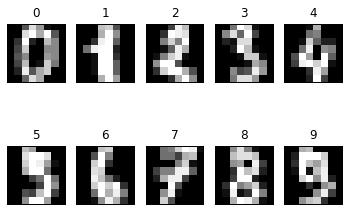

In [8]:
nrows, ncols = 2, 5
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])


4. Now, let's fit a K-nearest neighbors classifier on the data.

In [9]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25)

In [10]:
knc = nb.KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

5 Let's evaluate the score of the trained classifier on the test dataset.

In [11]:
knc.score(X_test, y_test)

0.98444444444444446

6. Now, let's see if our classifier can recognize a "hand-written" digit!

In [14]:
# Lets's draw  a 1
one = np.zeros((8, 8))
print(one)
one[1:-1, 4] = 16
print(one)
one[2, 3] = 16
print(one)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.  16.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.  16.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


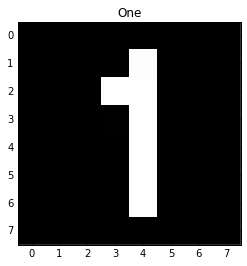

In [15]:
plt.imshow(one, interpolation='none')
plt.grid(False)
plt.xticks(); plt.yticks()
plt.title('One')

In [18]:
knc.predict(one.ravel())

/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])